### Importing the all the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

#### Loading the Dataset

In [2]:
df=pd.read_csv('preprocessed_housing_dataset.csv')

In [3]:
df.head()

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl_CompShg,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating_GasA,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt_gt_1990,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,3,0,0,7,5,2003,2003,1,196.0,4,3,4,3,1,6,706,1,0,150,856,1,5,1,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,5,1,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,208500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,0,3,3,0,6,8,1976,1976,1,0.0,3,3,4,3,4,5,978,1,0,284,1262,1,5,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,5,0,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,181500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,1,3,0,0,7,5,2001,2002,1,162.0,4,3,4,3,2,6,486,1,0,434,920,1,5,1,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,5,1,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,223500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,84.0,14260,1,3,3,0,8,5,2000,2000,1,350.0,4,3,4,3,3,6,655,1,0,490,1145,1,5,1,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,5,1,2,3,836,3,3,2,192,84,0,0,0,0,0,0,0,250000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,85.0,14115,1,3,0,0,5,5,1993,1995,1,0.0,3,3,4,3,1,6,732,1,0,64,796,1,5,1,5,796,566,0,1362,1,0,1,1,1,1,3,5,8,0,0,5,1,1,2,480,3,3,2,40,30,0,320,0,0,0,3,700,143000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [4]:
df.SalePrice.describe()


count      1116.000000
mean     176738.195341
std       70249.771478
min       39300.000000
25%      130500.000000
50%      160600.000000
75%      207500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
df.SalePrice.dtypes

dtype('int64')

### Converting the target into binary classifictaion

In [6]:
df['Target'] = np.where(df['SalePrice'] > 180000, 1, 0) # if price > 180000 then target == 1 else 0


In [7]:
df.drop('SalePrice', axis=1, inplace=True) # we dont need this since we have created the target column

### Creating train and test splits

In [8]:
# Create X (all columns except target)
X = df.drop("Target",axis=1)

# Create y (only the target column)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42)

## Scaling (We will not use scaled data for RandomForest)

In [9]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

## Random Forest with hyperparameter tuning using RandomisedSearchCV

In [10]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
np.random.seed(44)

classifier = RandomForestClassifier()
cv = StratifiedKFold(n_splits=10)
model_rf= RandomizedSearchCV(estimator=classifier,
                          param_distributions=grid,
                          n_iter=20,
                          cv=cv,
                          verbose=1,random_state=42)

model_rf.fit(X_train, y_train) # fitting the model

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=1)

### Predictions

In [11]:
y_preds=model_rf.predict(X_test)

### Model Evaluation

In [12]:
#Accuracy statistics:

print('Accuracy Score:', accuracy_score(y_test, y_preds))  
print(" ")
#Creation of the classification report:
class_report=classification_report(y_test, y_preds)
print(class_report)

Accuracy Score: 0.9404761904761905
 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.91      0.94      0.92        63

    accuracy                           0.94       168
   macro avg       0.93      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



### Confusion Matrix

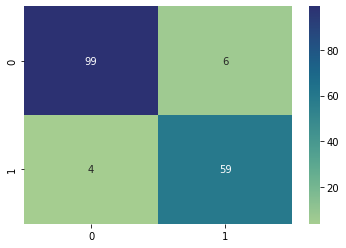

In [13]:
cm = confusion_matrix(y_test, y_preds)
fig = sns.heatmap(cm, annot=True, fmt=".0f",cmap="crest");

### ROC Curve

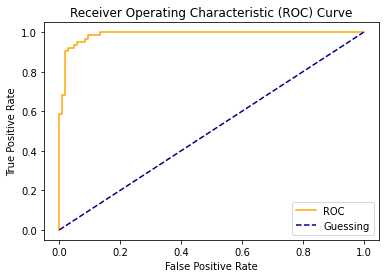

In [15]:
# Make predictions with probabilities
y_probs = model_rf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [16]:
roc_auc_score(y_test, y_probs) # ROC Score

0.9877551020408164

# KNN without PCA

In [17]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

# summarize results
grid_predictions= grid_search.predict(X_test_scaled)
print('Accuracy Score:', accuracy_score(y_test, grid_predictions))  
print(" ")

#Creation of the classification report:
class_report=classification_report(y_test, grid_predictions)
print(class_report)


Accuracy Score: 0.9523809523809523
 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.94      0.94      0.94        63

    accuracy                           0.95       168
   macro avg       0.95      0.95      0.95       168
weighted avg       0.95      0.95      0.95       168



## ROC Curve KNN without PCA

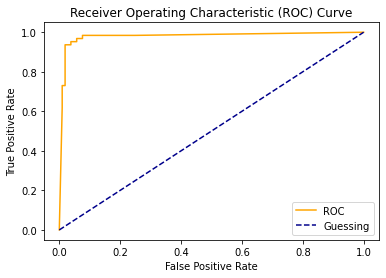

In [18]:
# Make predictions with probabilities
y_probs_knn = grid_search.predict_proba(X_test_scaled)

# Keep the probabilites of the positive class only
y_probs_knn = y_probs_knn[:, 1]

# Calculate fpr, tpr and thresholds
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs_knn)
    
plot_roc_curve(fpr2, tpr2)

In [19]:
roc_auc_score(y_test, y_probs_knn)


0.9794406651549509

## PCA

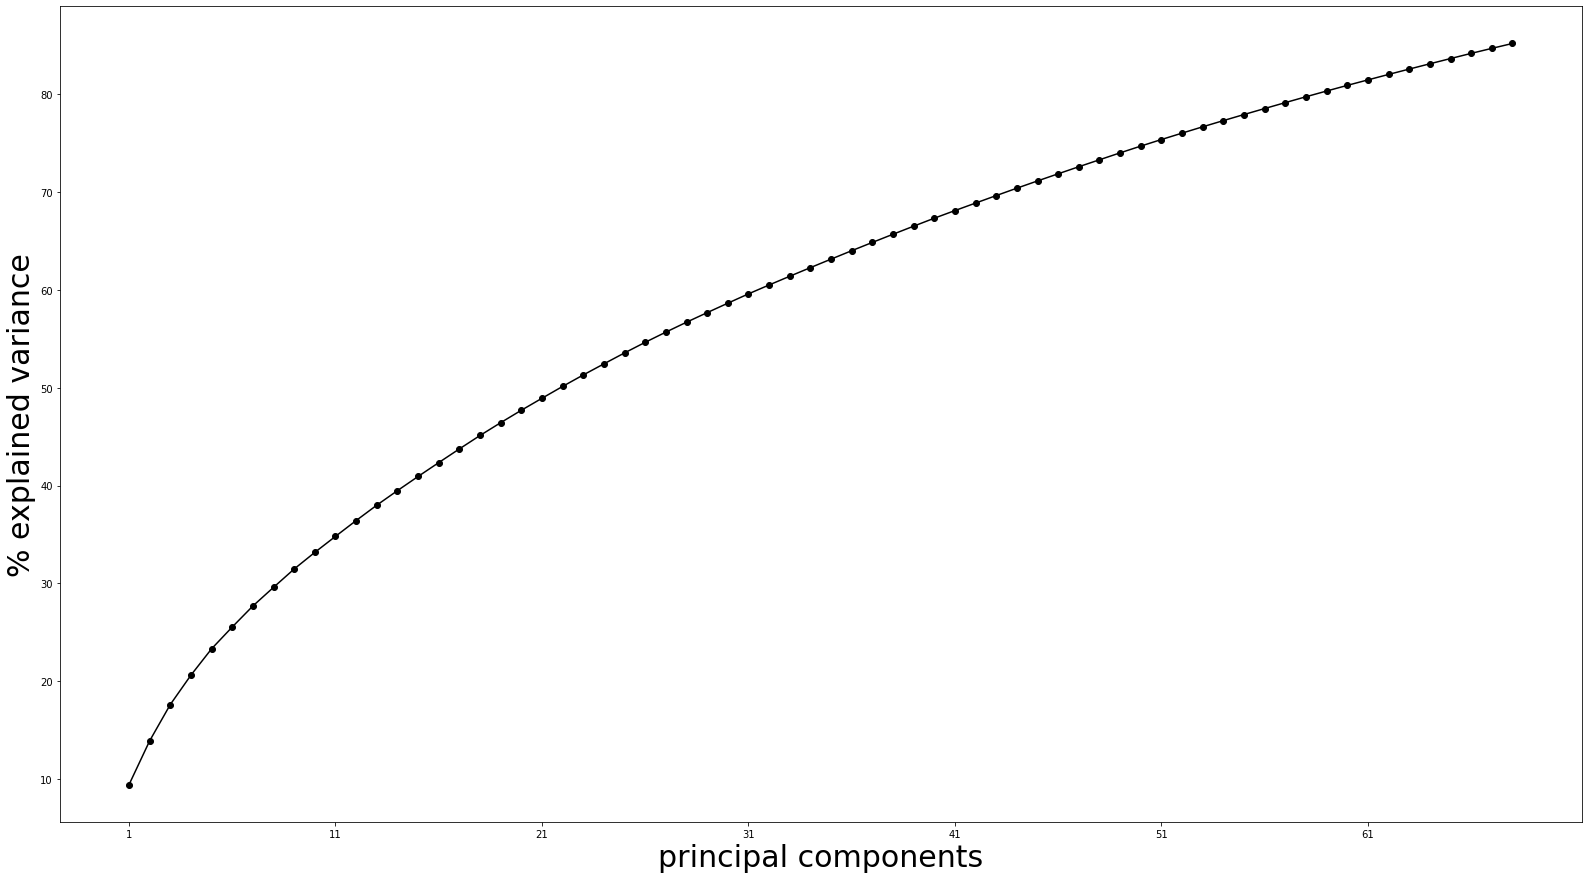

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85)
X_train_scaled_pca = pca.fit_transform(X_train_scaled) # performing PCA on the scaled set

plt.figure(figsize=(60,15))

plt.subplot(1,2,2)
plt.plot(range(1,pca.n_components_+1),
         100*pca.explained_variance_ratio_.cumsum(), '-ok')
plt.xlabel('principal components', fontsize=30)
plt.ylabel('% explained variance', fontsize=30)
plt.xticks(range(1,pca.n_components_+1,10));

In [21]:
pca.n_components_

68

In [22]:
X_test_scaled_pca = pca.transform(X_test_scaled) #performing PCA on the test set


## KNN with PCA

In [23]:
# Model Construction
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled_pca, y_train)

# summarize results
grid_predictions= grid_search.predict(X_test_scaled_pca)
print('Accuracy Score:', accuracy_score(y_test, grid_predictions))  
print(" ")

#Creation of the classification report:
class_report=classification_report(y_test, grid_predictions)
print(class_report)

Accuracy Score: 0.9642857142857143
 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.95      0.95      0.95        63

    accuracy                           0.96       168
   macro avg       0.96      0.96      0.96       168
weighted avg       0.96      0.96      0.96       168



## KNN with PCA ROC Curve

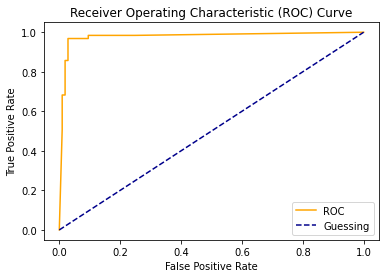

In [24]:
# Make predictions with probabilities
y_probs_knn_pca = grid_search.predict_proba(X_test_scaled_pca)

# Keep the probabilites of the positive class only
y_probs_knn_pca = y_probs_knn_pca[:, 1]

# Calculate fpr, tpr and thresholds
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs_knn_pca)

    
plot_roc_curve(fpr3, tpr3)

In [25]:
roc_auc_score(y_test, y_probs_knn_pca)


0.9780045351473923

### Loading the Production Dataset

In [26]:
df_prod=pd.read_csv('preprocessed_housing_dataset_production.csv')

In [27]:
df_prod.head()

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl_CompShg,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating_GasA,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt_gt_1990,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,80.0,9828,1,3,0,0,8,5,1995,1995,1,0.0,4,3,4,3,1,6,584,1,0,544,1128,1,5,1,5,1142,878,0,2020,0,0,2,1,3,1,4,8,8,1,3,5,1,2,2,466,3,3,2,0,155,0,0,0,0,0,0,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,50.0,9000,0,2,0,0,6,6,1937,1950,1,0.0,3,4,3,3,1,1,0,1,0,780,780,1,3,1,5,780,595,0,1375,0,0,1,1,3,1,4,6,8,1,4,1,0,1,1,544,3,3,1,0,162,0,0,126,0,0,0,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.0,25339,0,3,0,0,5,7,1918,2007,1,0.0,3,4,3,3,1,1,0,1,0,816,816,1,5,1,5,1416,0,0,1416,0,0,2,0,3,1,4,7,8,0,0,5,1,1,2,576,3,3,0,0,0,112,0,0,0,0,0,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.0,29959,2,3,3,0,7,6,1994,1994,1,0.0,4,3,4,3,1,6,595,1,0,378,973,1,5,1,5,979,871,0,1850,0,0,2,1,3,1,4,7,8,1,4,3,1,3,2,467,3,3,2,168,98,0,0,0,0,0,0,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,80.0,9600,0,3,0,0,6,6,1955,1972,1,164.0,3,3,3,3,3,4,674,2,132,350,1156,1,5,1,5,1520,0,0,1520,1,0,1,0,3,1,3,7,8,2,4,4,0,2,1,364,3,3,2,0,0,189,0,0,0,0,0,0,-1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [28]:
df_prod.shape

(100, 145)

## Predictions on Production

In [29]:
df_prod.drop('SalePrice', axis=1, inplace=True) # we dont need this since this is the target
model_rf.fit(X,y) #fitting the model random forest again on entire set
predictions_housing=model_rf.predict(df_prod) # storing predictions
predictions=pd.DataFrame(predictions_housing).to_csv('predictions_housing_classification.csv') #saving the submissions as CSV file which has been emailed


Fitting 10 folds for each of 20 candidates, totalling 200 fits


# Conclusion

RandomForest is doing a better job at classification on this dataset. PCA is not helping KNN classify better, probably because there are quite a few categorial features 